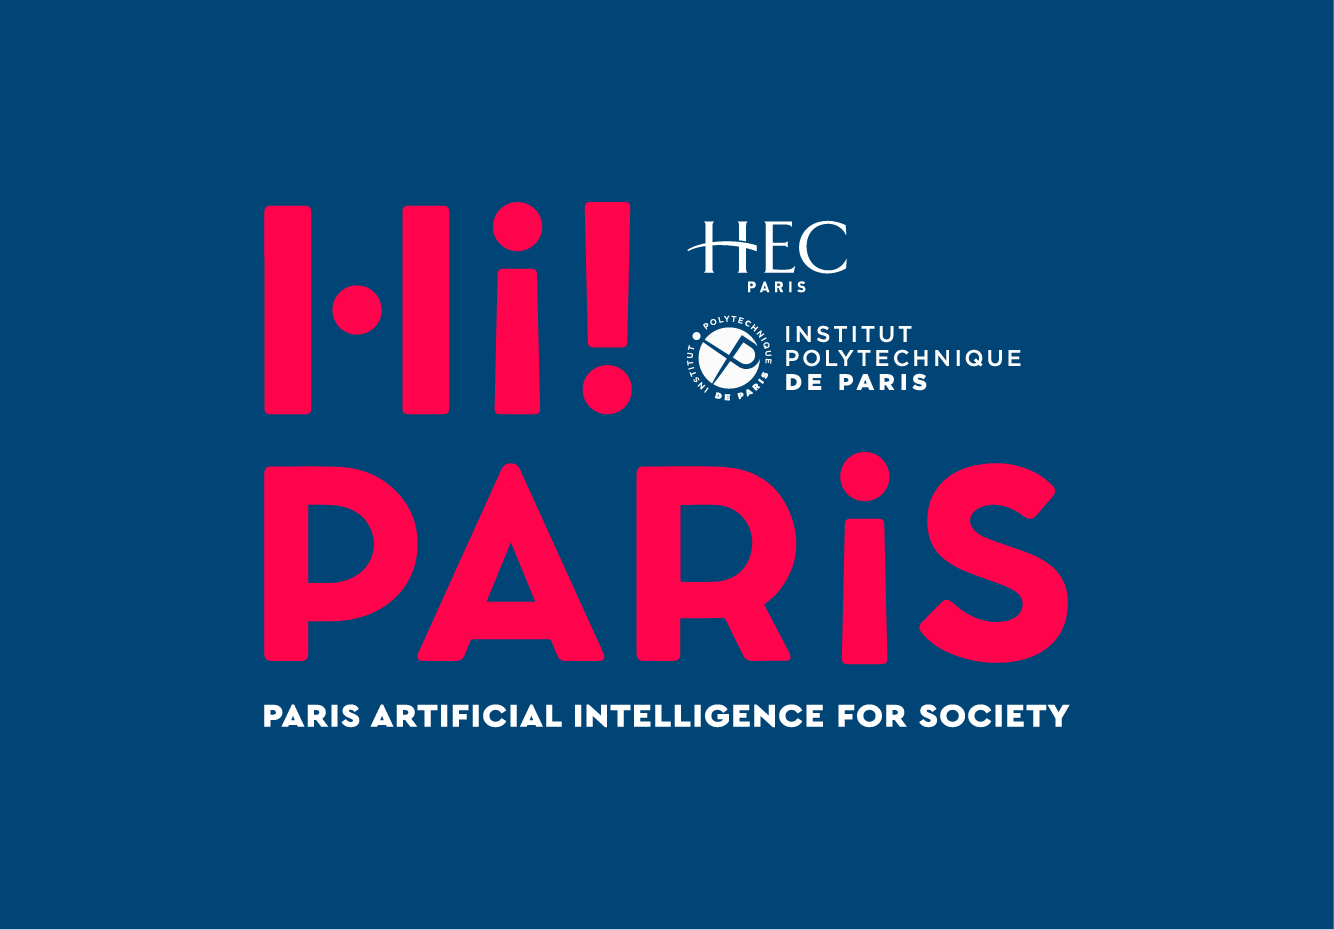

In [1]:
from IPython import display
display.Image("src/figures/Hi!PARIS_logo_bleu.png")

<br>
<body>
    <p style="font-size:50px;text-align:center; color:#004475"><b><span style="color: #e61853">Hi!</span>ckathon 3</b></p><br>
    <p style="font-size:35px;text-align:center; color:#004475">Week 5 : Deep learning</p>
    <p style="font-size:25px;text-align:center; color:#004475">Estimated duration : 2-3h</p><br>
    <br><p style="font-size:15px;text-align:center; color:#004475"><b>Authors : KA Alioune, IHADDADENE Mohamed, VENET Thibault</b></p><br>
</body>
<br>

<br>
<p style="font-size:30px;color:#004475">I. About this notebook</p>
<br>

<p style="text-align: justify;text-indent: 30px">
    In this part of the training, we will address two essential elements in deep learning or more generally in machine learning: 
    
- A short recall on perceptron models
- The different layer to construct a Convolutionnal Neural Network
    
</p><br>
    
<b>N.B. :</b> Don't forget to execute the cells containing code ;)

In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.metrics import confusion_matrix
import seaborn as sns 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16
from sklearn.model_selection import train_test_split
from IPython.display import IFrame

<br>
<p style="font-size:30px;color:#004475">II. Perceptron </p>
<br>

<br>
<p style="text-align: justify;text-indent: 30px"> Perceptron is a model meant to replicate the functionning of a biological neurone. Indeed biological neurons have a control center (called a somatic cell) that sums up the information collected by the dendrites. Then, the control center returns an action potential following the following rules:</p>

- If the input sum does not exceed the excitation threshold: no nerve message via the axon.
- If the input sum exceeds the excitation threshold: a nerve message is emitted via the axon (this is the idea, but in reality a little more complicated).


<br>
<p style="text-align: justify;text-indent: 30px"> The Perceptron model works like this: it takes inputs and for each input associates a weight, then it realizes a linear combination to which it applies an activation function. This is the mathematical definition of the output of the model :</p>

<br>
<center>
$Output = \sigma(b + \sum_{i=0}^{n}{w_i\cdot{x_i}}) = \sigma(b + <w|x>)$
</center>    
</br>  

Where : 
- **$x_i$** the inputs of the model. The x vector is named as the input vector. 
- **$w_i$** each weight associated to $x_i$. The w vector is named as the weights vector.
- **$\sigma$** the heaviside function. 
- **$b$** the bias. 

The heaviside function is defined like this : 
$$
\begin{split} heaviside(x)=\begin{cases}1 \textrm{ if } x>0 \\ 0 \textrm{ if } x\leq0.\end{cases}\end{split}
$$</p><br>

This is a very simple binary classifier which ensure you that if your data are linearly separable, this model converge to a solution.

<br>
<p style="text-align: justify;text-indent: 30px"> Suppose that we want to predict a continuous variable using a perceptron, we need to consider the identity function rather than the heaviside function in order to get a simple linear model. Generally with this kind of model we try to optimize the weights to minimize a loss function like mean squared error. We have two strategies on how we could find these optimal weights : </p>

- Solving the least squares problem and finding the explicit solution. 
- Training our model and optimize the weights and bias using an optimizing algorithm such as **Gradient Descent** regarding our loss function. This strategy differs with the method used in the perceptron model. 

<p style="text-align: justify"> <b>keras</b>, a Deep Learning library, is using the second stategy and we will see how to implement it. First let's define a random dataset on which we will work.</p>

In [2]:
X, y = make_regression(n_samples=100, 
                       n_features=1,
                       n_informative=1,
                       noise = 24,
                       random_state=123)
#X = np.squeeze(X)

X.shape, y.shape

((100, 1), (100,))

<p style="text-align: justify"> We are trying to find optimal weights and bias to minimize the loss function, mean squared error :</p>

<br>
<center>
    $\frac{1}{n}\sum_{i=1}^{n}{(y_i - \hat{y_i})^2}$
</center>

<p style="text-align: justify;text-indent: 30px"> 
    First using the method <b>Sequential</b> we instantiate a model and then add a Dense layer with one neuron and  <b>linear</b> as an activation function. The <b>compile</b> method is used to define our optimizer and our loss function. The <b>fit</b> method is used to train the model specifying the number of epochs and the size of the batches.</p>  

In [3]:
#Defined our model
model = Sequential()
model.add(Dense(1, activation='linear', input_shape=(1,)))

#compile the model
model.compile(optimizer=Adam(1e-1), loss='mse')

#Training our model
model.fit(X, y, batch_size=32, epochs=100)

2023-01-08 09:58:35.759773: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-01-08 09:58:35.759831: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-08 09:58:35.759883: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2023-01-08 09:58:35.760258: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
4/4 [==============================] - 0s 9ms/step - loss: 1973.8972
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1938.0068
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 1905.6132
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 1874.5909
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 1843.1830
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 1812.8907
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 1781.8983
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 1754.1598
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1726.3751
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1698.6108
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 1671.8063
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 1645.5057
Epoch 13/100
4/4 [=======

<p style="text-align: justify"> Let's evaluate the results of our model. </p>

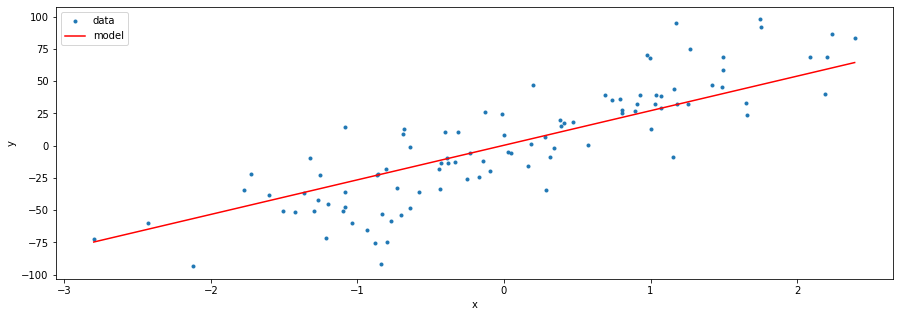

In [4]:
import matplotlib.pyplot as plt
X_test = np.linspace(min(X), max(X), 100)
y_pred = model.predict(X_test)

plt.figure(figsize=(15,5))
plt.plot(X, y , '.', label='data')
plt.plot(X_test, y_pred , '-', label='model',color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

<span style="color:#004475"><b>Exercise 1 : Let's see if by improving the number of epochs you can improve and still decrease the value of our loss function during the training.</b>

In [5]:
#Defined our model
model = Sequential()
model.add(Dense(1, activation='linear', input_shape=(1,)))

#compile the model
model.compile(optimizer=Adam(1e-1), loss='mse')

#Training our model
model.fit(X, y, batch_size=32, epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 2ms/step - loss: 1938.7837
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 1906.7837
Epoch 3/300
4/4 [==============================] - 0s 1ms/step - loss: 1873.3208
Epoch 4/300
4/4 [==============================] - 0s 1ms/step - loss: 1842.3250
Epoch 5/300
4/4 [==============================] - 0s 1ms/step - loss: 1812.8315
Epoch 6/300
4/4 [==============================] - 0s 1ms/step - loss: 1780.8661
Epoch 7/300
4/4 [==============================] - 0s 1ms/step - loss: 1752.3022
Epoch 8/300
4/4 [==============================] - 0s 1ms/step - loss: 1722.3590
Epoch 9/300
4/4 [==============================] - 0s 1ms/step - loss: 1692.7791
Epoch 10/300
4/4 [==============================] - 0s 1ms/step - loss: 1664.4351
Epoch 11/300
4/4 [==============================] - 0s 1ms/step - loss: 1636.0580
Epoch 12/300
4/4 [==============================] - 0s 1ms/step - loss: 1606.4396
Epoch 13/300
4/4 [=======

<p style="text-align: justify;text-indent: 30px"> If we look at the training results we see that at some point the loss value stops decreasing and stay around 512 or 513. It shows us that there is no need to train our model with too many epochs because at some point there is no improvement.</p> 

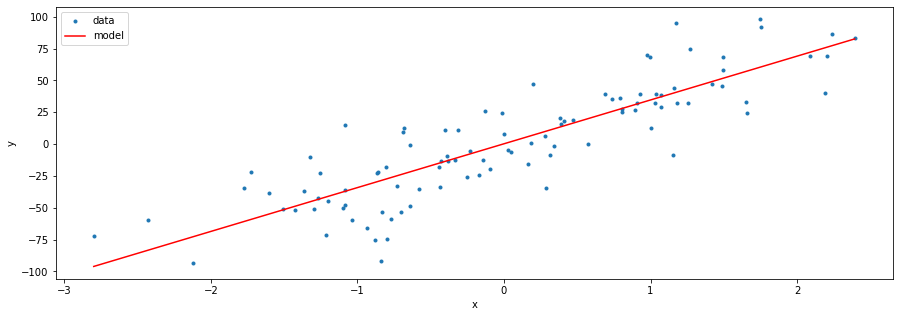

In [6]:
import matplotlib.pyplot as plt
X_test = np.linspace(min(X), max(X), 100)
y_pred = model.predict(X_test)

plt.figure(figsize=(15,5))
plt.plot(X, y , '.', label='data')
plt.plot(X_test, y_pred , '-', label='model', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

<p style="text-align: justify;text-indent: 30px"> When we design our model we choose linear as an activation function because we try to estimate a continuous variable. The choice of activation function depends on the output and what you are trying to predict. For example if you try to predict a variable with only 2 values 0 or 1 the linear activation function is not suitable for this task. In this case, you use the sigmoid activation function which take as an input values between ($-\infty,+\infty$) and return a value between 0 and 1. You can see the result as a probability and define a threshold to determine if the results is 0 or 1. This problem is equivalent to a <b>Logistic Regression.</b>
    
<p style="text-align: justify">Also the perceptron model is able to find linear relationship but what about polynomial relationship for example ?</p>

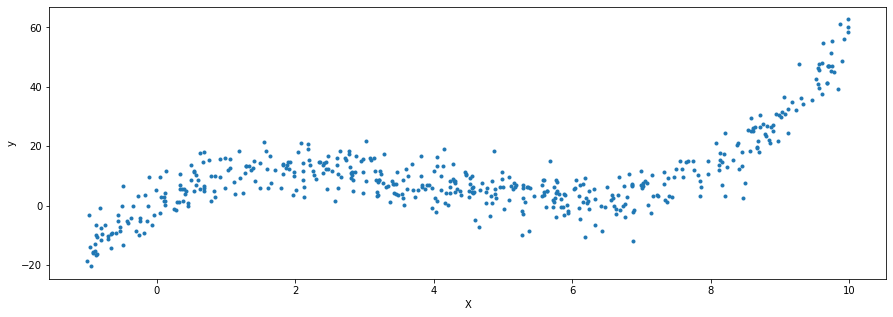

In [7]:
def f(x, sigma, coeffs):
    fx = [x**i*c for i, c in enumerate(coeffs)]
    return sum(fx) + np.random.normal(0, sigma, len(x))

X = np.random.uniform(-1, 10, 500)
y = f(X, 5, [2,12,-4, 1/3])

plt.figure(figsize=(15,5))
plt.plot(X, y , '.')
plt.xlabel('X')
plt.ylabel('y');

<p style="text-align: justify"> Let's train again our model on this new dataset and evaluate the results.</p>

In [8]:
#Defined our model
model = Sequential()
model.add(Dense(1, activation='linear', input_shape=(1,)))

#compile the model
model.compile(optimizer=Adam(1e-1), loss='mse')

#Training our model
model.fit(X, y, batch_size=32, epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 3ms/step - loss: 268.1482
Epoch 2/100
16/16 [==============================] - 0s 999us/step - loss: 141.6327
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 120.4603
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 118.8471
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 117.5511
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 117.1412
Epoch 7/100
16/16 [==============================] - 0s 999us/step - loss: 116.3523
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 116.0418
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 115.7713
Epoch 10/100
16/16 [==============================] - 0s 978us/step - loss: 115.5240
Epoch 11/100
16/16 [==============================] - 0s 1ms/step - loss: 115.4551
Epoch 12/100
16/16 [==============================] - 0s 1ms/step - loss: 115.0220
Epoch 1

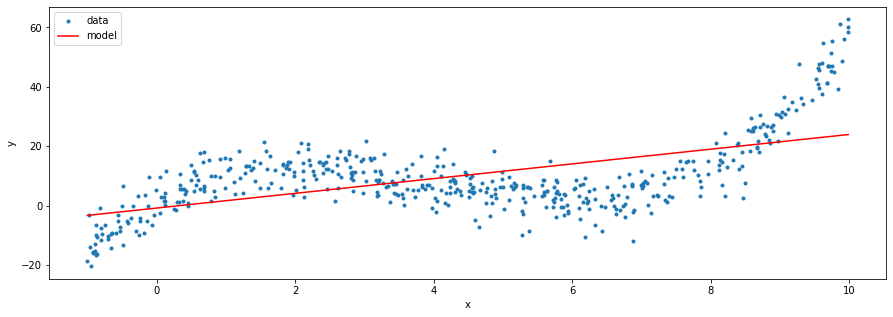

In [9]:
X_test = np.linspace(min(X), max(X), 200)
y_pred = model.predict(X_test)

plt.figure(figsize=(15,5))
plt.plot(X, y , '.', label='data')
plt.plot(X_test, y_pred , '-', label='model', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

<p style="text-align: justify"> With no surprise our model is enable to detect a non linear relationship </p>

<br>
<p style="font-size:30px;color:#004475">III. Multi Layer Perceptron </p>
<br>

<p style="text-align: justify;text-indent: 30px"> That's here we introduce the Multi-Layer Perceptron (MLP) which is just a a sequential stacking of perceptron with non linear activation function in order to detect features more complex than linear relationship.</p>

General architecure:

<center><img src="https://miro.medium.com/max/1400/1*-gNu03HlMMlr6hlgXA6L0g.png" width=800></center>

<p style="text-align: justify;text-indent: 30px"> The Multi-Layer Perceptron (MLP) can be built sequentially by stacking dense layers one after the other. The output of an hidden layer is the input of the next hidden layer. This model aim to find the best parameters that give the best prediction/approximation $\hat{y_i}$, starting from the input $x_i$, of the real value $y_i$.
<br>For this, we define an objective function called the <b>loss function</b> and denoted <b>J</b>  which quantifies the distance between the real and the predicted values on the overall training set.
    
<br>We minimize <b>J</b> following two major steps:
    
- <b>Forward Propagation</b> : we propagate the data through the network either in entirely or in batches, and we calculate the loss function on this batch which is nothing but the sum of the errors committed at the predicted output for the different rows.
- <b>Backpropagation</b> : consists of calculating the gradients of the cost function with respect to the different parameters, then apply a descent algorithm to update them.

We iter the same process a number of times called `epoch number`.
After defining the architecture, the learning algorithm is written as follows:

>* Initialization of the model parameters, a step equivalent to injecting noise into the model.
>* `For` i=1,2...N: (N is the number of epochs)
>    - Perform `forward propagation`:
>        - $\forall i$, Compute the predicted value of $x_i$ through the neural network: $\hat{y}_i^{\theta}$
>        - Evaluate the function : $J(\theta)=\frac{1}{m}\sum_{i=1}^m \mathcal{L}(\hat{y}_i^{\theta}, y_i)$
>        where m is the size of the training set, θ the model parameters and $\mathcal{L}$ the cost${}^{(*)}$ function</br>
>    - Perform `backpropagation`:
>        - Apply a descent method to update the parameters :
>           $$\theta=:G(\theta)$$

${}^{(*)}$ The cost function $\mathcal{L}$ evaluates the distances between the real and predicted value on a single point.

    
    
<p>Let's see, in the following code, how to build such model. </p>

In [10]:
#Defined our model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(1,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation=None))

#compile the model
model.compile(optimizer=Adam(1e-1), loss='mse')

#Training our model
model.fit(X, y, batch_size=32, epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 3ms/step - loss: 209.8624
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 135.0903
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 115.9793
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 134.4111
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 122.7684
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 122.2954
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 107.9179
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 100.7610
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 72.8736
Epoch 10/100
16/16 [==============================] - 0s 3ms/step - loss: 52.1039
Epoch 11/100
16/16 [==============================] - 0s 2ms/step - loss: 44.1054
Epoch 12/100
16/16 [==============================] - 0s 3ms/step - loss: 63.6219
Epoch 13/100
16/1

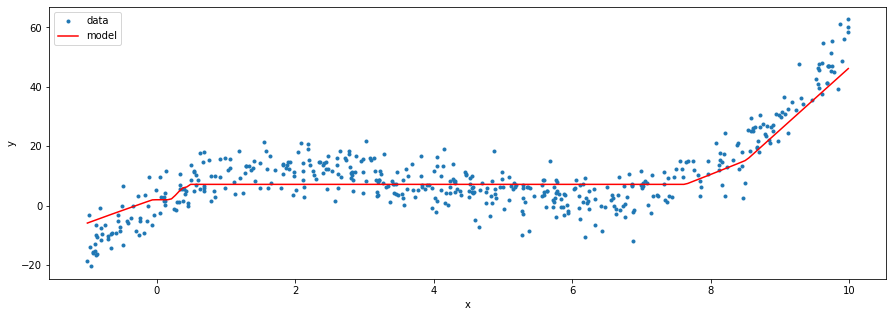

In [11]:
X_test = np.linspace(min(X), max(X), 200)
y_pred = model.predict(X_test)

plt.figure(figsize=(15,5))
plt.plot(X, y , '.', label='data')
plt.plot(X_test, y_pred , '-', label='model', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

<p style="text-align: justify"> As we can see the model is able to approximate a polynome. Let's try with another activation function such as <b>tanh</b>.</p>

In [12]:
#Defined our model
model = Sequential()
model.add(Dense(100, activation='tanh', input_shape=(1,)))
model.add(Dense(50, activation='tanh'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(1, activation=None))

#compile the model
model.compile(optimizer=Adam(1e-2), loss='mse')

#Training our model
model.fit(X, y, batch_size=64, epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 185.1924
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 151.8733
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 144.2479
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 139.5532
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 138.9153
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 137.8443
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 136.0933
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 134.2749
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 128.8436
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 122.4935
Epoch 11/100
8/8 [==============================] - 0s 2ms/step - loss: 114.2763
Epoch 12/100
8/8 [==============================] - 0s 9ms/step - loss: 105.9270
Epoch 13/100
8/8 [===================

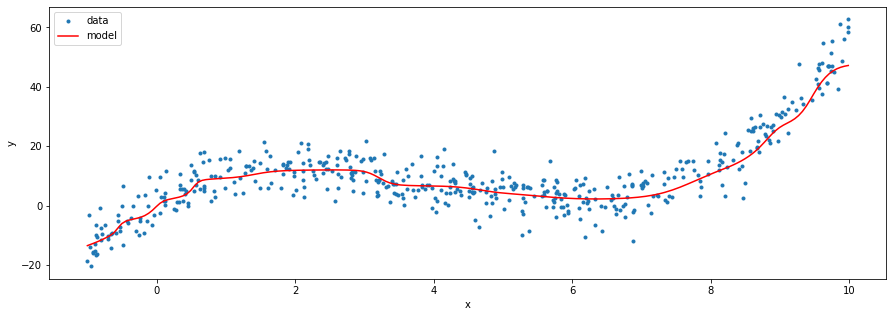

In [13]:
X_test = np.linspace(min(X), max(X), 200)
y_pred = model.predict(X_test)

plt.figure(figsize=(15,5))
plt.plot(X, y , '.', label='data')
plt.plot(X_test, y_pred , '-', label='model', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

<p style="text-align: justify;text-indent: 30px"> You will find many other activation function <a href="https://keras.io/api/layers/activations/")>here</a>. Backpropagation is a key step to understand how to update weights during the training.</p>
    
<p>To understand the purpose we can go back to our first model with only one neurone. This was our output :</p>

<br>
<center>
    $Output = \sigma(b + \sum_{i=1}^{n}{w_i\cdot{x_i}})$
</center>

<p>Considering we are predicting a continuous variable we assume that $\sigma$ is the identity and then we have :</p>
<br>
<center>
    $Output = b + \sum_{i=1}^{n}{w_i\cdot{x_i}}$
</center>

<p> Then the loss (MSE) becomes :</p>
<br>
<center>
    $loss = \frac{1}{n}\sum_{i=1}^{n}{(y_i - (b + \sum_{i=1}^{n}{w_i\cdot{x_i}}})^2)$
</center>

<p> In order to update the weights of our model we need to calculate the first derivative of our loss function regarding $w_j$ :</p>

<br>
<center>
    $\frac{\partial loss}{\partial w_j} = \frac{-2}{n}\sum_{i=1}^{n}x_j\cdot{(y_i - b + \sum_{i=1}^{n}{w_i\cdot{x_i}})} = \frac{-2}{n}\sum_{i=1}^{n}x_j\cdot({y_i - \hat{y_i}})$
</center>

<p>Then we can update the weights according to the Gradient Descent algorithm :</p>

<br>
<center>
    $w_j = w_j - \alpha\cdot{\frac{\partial loss}{\partial w_j}}$
</center>    

<p>We can do the same with the bias :</p>

<br>
<center>
    $\frac{\partial loss}{\partial b} = \frac{-2}{n}\sum_{i=1}^{n}({y_i - \hat{y_i}})$
</center>  

<br>
<center>
    $b = b - \alpha\cdot\frac{\partial loss}{\partial b}$
</center> 

<p> We iterate the process until we get convergence and minimize the loss as much as possible. It's possible to generalise this process with activation function for Multi-Layer Perceptron (MLP) model. The backpropagation algorithm is implemented in <b>keras</b> and used to optimize deep neural network.</p>

<p>Let's see the results we obtain on a more concrete example, the Fashion MNIST Dataset.<p>


4431872/4422102 [==============================] - 0s 0us/step
(50000, 28, 28) (10000, 28, 28)


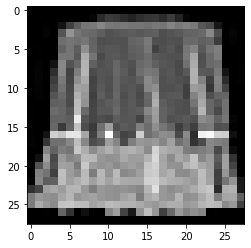

In [14]:
(X_train, y_train), (X_test, y_test) = load_data()

X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

print(X_train.shape, X_test.shape)

aleat = np.random.randint(0,len(X_train))
number = X_train[aleat]

plt.imshow(number, cmap='gray');

<p style="text-align: justify;text-indent: 30px"> Before starting we need to define our goal. We want to train our model to recognize 10 fashion categories which represent 10 classes. Indeed we want on our last layer 10 neurones each returning an activation level. The highest will be the class predicted. In order to do that we can use the <b>softmax</b> activation function on our last layer and a specific loss function : <b>SparseCategoricalCrossentropy</b>.</p>

<p style="text-align: justify;text-indent: 30px"> By using the <b>softmax</b> on the last layer, the elements of the output vector are in range (0, 1) and sum to 1.
    <b>Softmax</b> converts a vector of values to a probability distribution.</p>
    
<p>Finally we will consider each pixels of our image as an inputs for our model which give us 784 neurones on the first layer.</p> 

In [15]:
mlp_mnist = Sequential()
mlp_mnist.add(Flatten())
mlp_mnist.add(Dense(50,activation='relu'))
mlp_mnist.add(Dense(50,activation='relu'))
mlp_mnist.add(Dense(10,activation='softmax'))

#compile the model
mlp_mnist.compile(optimizer="adam", metrics = ['acc'], loss='sparse_categorical_crossentropy')

#Training our model
mlp_mnist.fit(X_train/255, y_train, validation_data=(X_val/255, y_val), batch_size=64, epochs=10)

Epoch 1/10
782/782 [==============================] - 4s 5ms/step - loss: 0.5841 - acc: 0.8005 - val_loss: 0.4382 - val_acc: 0.8467
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.4138 - acc: 0.8533 - val_loss: 0.4024 - val_acc: 0.8558
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.3722 - acc: 0.8670 - val_loss: 0.3819 - val_acc: 0.8665
Epoch 4/10
782/782 [==============================] - 4s 6ms/step - loss: 0.3480 - acc: 0.8748 - val_loss: 0.3658 - val_acc: 0.8675
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.3280 - acc: 0.8805 - val_loss: 0.3584 - val_acc: 0.8736
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.3135 - acc: 0.8859 - val_loss: 0.3477 - val_acc: 0.8751
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2994 - acc: 0.8898 - val_loss: 0.3453 - val_acc: 0.8769
Epoch 8/10
782/782 [==============================] - 4s 5ms/step - loss: 0.

Let's evaluate the training of our model.

313/313 - 1s - loss: 0.3798 - acc: 0.8678 - 525ms/epoch - 2ms/step
[0.3798442780971527, 0.8677999973297119]


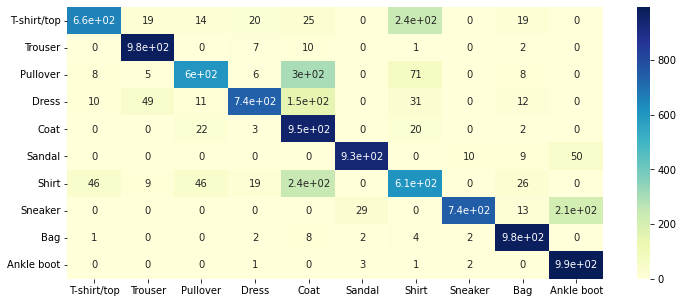

In [16]:
print(mlp_mnist.evaluate(X_test/255,  y_test, verbose=2))

pred = mlp_mnist.predict(X_test)
pred = [np.argmax(arr) for arr in pred]

labels = ["T-shirt/top",
          "Trouser",
          "Pullover",
          "Dress",
          "Coat",
          "Sandal",
          "Shirt",
          "Sneaker",
          "Bag",
          "Ankle boot"]

plt.figure(figsize = (12,5))
ax = sns.heatmap(confusion_matrix(y_test, pred), 
                 annot=True, 
                 cmap="YlGnBu",
                 xticklabels=labels, 
                 yticklabels=labels)

<p style="text-align: justify;text-indent: 30px"> The results are quite good but we observe that many pullovers are misclassified as coats for example. We can do better and we will see how on the next part. 

<span style="color:#004475"><b> Exercice 2 : Let's play with the previous model by changing the number of neurons and the activation function by tanh or elu for example.</b>

In [17]:
mlp_mnist_2 = Sequential()
mlp_mnist_2.add(Flatten())
mlp_mnist_2.add(Dense(200,activation='tanh'))
mlp_mnist_2.add(Dense(100,activation='tanh'))
mlp_mnist_2.add(Dense(10,activation='softmax'))

#compile the model
mlp_mnist_2.compile(optimizer="adam", metrics = ['acc'], loss='sparse_categorical_crossentropy')

#Training our model
mlp_mnist_2.fit(X_train/255, y_train, validation_data=(X_val/255, y_val), batch_size=64, epochs=10)

Epoch 1/10
782/782 [==============================] - 6s 7ms/step - loss: 0.4897 - acc: 0.8224 - val_loss: 0.4234 - val_acc: 0.8442
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.3732 - acc: 0.8634 - val_loss: 0.3559 - val_acc: 0.8693
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.3341 - acc: 0.8772 - val_loss: 0.3745 - val_acc: 0.8638
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 0.3107 - acc: 0.8837 - val_loss: 0.3449 - val_acc: 0.8732
Epoch 5/10
782/782 [==============================] - 5s 7ms/step - loss: 0.2898 - acc: 0.8925 - val_loss: 0.3452 - val_acc: 0.8739
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 0.2752 - acc: 0.8965 - val_loss: 0.3347 - val_acc: 0.8736
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2631 - acc: 0.9020 - val_loss: 0.3297 - val_acc: 0.8834
Epoch 8/10
782/782 [==============================] - 5s 6ms/step - loss: 0.

<p style="text-align: justify;text-indent: 30px"> An idea to improve the model is to imagine that we could apply and optimize filters on our image to get the most important features regarding our classes and reduce the dimension of our image filtered. Indeed it will keep the most important features in our image and reduce its dimensions. That's the idea to keep in mind to understand the Convolution part.</p>

<center><img src="https://www.ismailmebsout.com/static/9908cee6d214afb1a6c018c3e973e5d0/108f8/learned_filter.png" width=400></center>

<br>
<p style="font-size:30px;color:#004475">IV. Convolution </p>
</br>

Before defining the convolutional product, we will first discover `padding` and `stride`
- **Padding**: adding of elements around the pictures in order to take into account the information in the borders

<center><img src="https://miro.medium.com/max/1400/1*9reDuDh3nXs_kJ-M4eq0Ow.png" width=600></center>

- **Stride**: the step taking in the convolutional product, it allows to shrink faster the size of the output 

<center><img src="https://miro.medium.com/max/1400/1*g_RWc_Z5ws6fzdbrkOkOPw.png" width=600></center>

- **Convolutional product**:
<br> Let's consider the case of a 3D image $(n_C=3)$ the convolutional with a filter is described by the following graph: 

<center><img src="https://miro.medium.com/max/1400/1*oCW5sShGseY-VNw1IjGR3w.png" width=600></center>

With : 
* $n_H$ the height of our image
* $n_W$ the width of our image
* $n_C$ the nbr of channels: grayscale:1, RGB:3 ...

<b>To go further</b> : 

In case of multiples fitlers we get:
* `Input`: $a^{[l-1]}$ with size $(n_H^{[l-1]},n_W^{[l-1]},n_C^{[l-1]})$, $a^{[0]}$ being the image in the input
* `Padding`: $p^{[l]}$, `stride`: $s^{[l]}$
* `Number of filters`: $n_C^{[l]}$ where each $K^{(n)}$ has the dimension: $(f^{[l]}, f^{[l]}, n_C^{[l-1]})$
* `Bias` of the $n^{th}$ convolution: $b^{[l]}_n$
* `Activation function`: $\psi^{[l]}$
* `Output`: $a^{[l]}$ with size $(n_H^{[l]},n_W^{[l]},n_C^{[l]})$

>$\forall n \in [1,2,...,n_C^{[l]}]:$ <center>$$conv(a^{[l-1]},K^{(n)})_{x,y}=\psi^{[l]}(\sum_{i=1}^{n_H^{[l-1]}}\sum_{j=1}^{n_W^{[l-1]}}\sum_{k=1}^{n_C^{[l-1]}}K^{(n)}_{i,j,k} a^{[l-1]}_{x+i-1,y+j-1,k}+b^{[l]}_n)\\dim(conv(a^{[l-1]},K^{(n)}))=(n_H^{[l]},n_W^{[l]})$$</center>

<center><img src="https://miro.medium.com/max/1400/1*yld1twhx2-RRir7oPafbTw.png" width=600></center>

The `learned parameters` at the $l^{th}$ layer are:
* **Filters** with $(f^{[l]}\times f^{[l]}\times n_C^{[l-1]})\times n_C^{[l]}$ parameters
* **Bias** with $(1\times 1\times 1)\times n_C^{[l]}$ parameters (broadcasting)

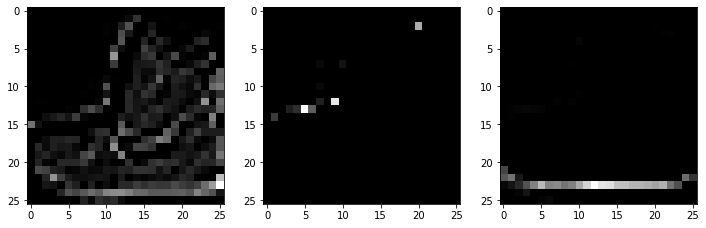

In [18]:
images = np.expand_dims(X_train[:4], -1).astype(float)
output = tf.keras.layers.Conv2D(3, (3, 3), activation='relu', input_shape=(28, 28,1))(images)

image = output.numpy()[0]

_, axs=plt.subplots(1,3, figsize=(12,6))
axs[0].imshow(image[:,:,0], cmap='gray');
axs[1].imshow(image[:,:,1], cmap='gray');
axs[2].imshow(image[:,:,2], cmap='gray');

<span style="color:#004475"><b> Exercice 3 : Try to implement two successive convolutional layers and observe the result on one image.</b>

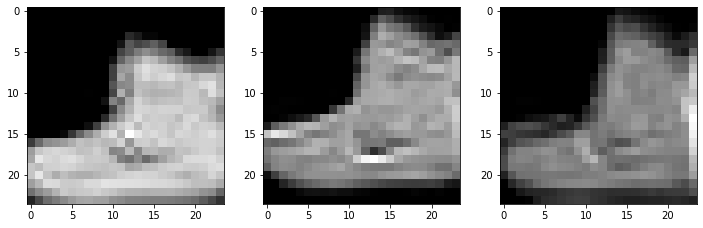

In [19]:
images = np.expand_dims(X_train[:4], -1).astype(float)
hidden = tf.keras.layers.Conv2D(3, (3, 3), activation='relu', input_shape=(28, 28,1))(images)
output = tf.keras.layers.Conv2D(3, (3, 3), activation='relu')(hidden)

image = output.numpy()[0]

_, axs=plt.subplots(1,3, figsize=(12,6))
axs[0].imshow(image[:,:,0], cmap='gray');
axs[1].imshow(image[:,:,1], cmap='gray');
axs[2].imshow(image[:,:,2], cmap='gray');

<br>
<p style="font-size:18px;color:#004475">IV.1.1 Pooling </p>
</br>

The pooling layer aims at downsampling the features of the input without impacting the number of the channels:
* `Input`: $a^{[l-1]}$ with size $(n_H^{[l-1]},n_W^{[l-1]},n_C^{[l-1]})$, $a^{[0]}$ being the image in the input
* `Padding`: $p^{[l]}$(rarely used), `stride`: $s^{[l]}$
* `Size` of the pooling filter: $f^{[l]}$
* `pooling function`: $\phi^{[l]}$
* `Output`: $a^{[l]}$ with size $(n_H^{[l]},n_W^{[l]},n_C^{[l]}=n_C^{[l-1]})$

<center>

>$$pool(a^{[l-1]})_{x,y,z}=\phi^{[l]}((a^{[l-1]}_{x+i-1,y+j-1,z})_{(i,j)\in [1,2,...,f^{[l]}]^2})\\dim(a^{[l]})=(n_H^{[l]},n_W^{[l]},n_C^{[l]})$$

</center>

<center><img src="https://miro.medium.com/max/1400/1*3AYOdJJ6aNVuj7sGzFPbzw.png" width=600></center>

`No parameter` to learn!

This is the result when we apply a MaxPooling2D operation : 

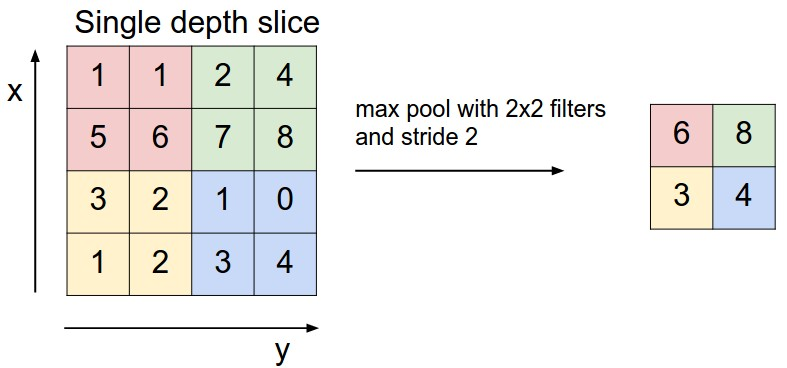

In [2]:
display.Image("src/figures/maxpool.jpeg")

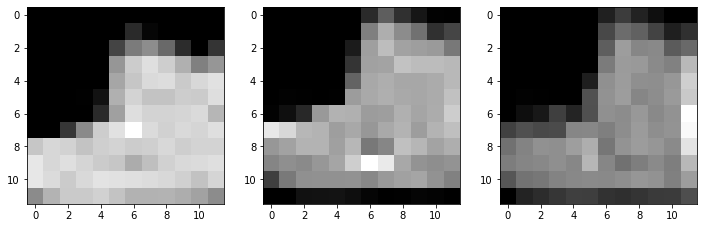

In [20]:
output_pool = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=None, padding='same')(output)

image_pooled = output_pool.numpy()[0]

_, axs=plt.subplots(1,3, figsize=(12,6))
axs[0].imshow(image_pooled[:,:,0], cmap='gray');
axs[1].imshow(image_pooled[:,:,1], cmap='gray');
axs[2].imshow(image_pooled[:,:,2], cmap='gray');

<br>
<p style="font-size:18px;color:#004475">IV.1.2 CNN architecture </p>
</br>
In general, a convolutional neural network is a series of all the operations described above as follows:

<center><img src="https://miro.medium.com/max/1400/1*uSQdT2LwPWzIXBdlHnJVMg.png" width=600></center>

The main idea is: going from an image one would want to decrease $n_H$ and $n_W$ and increase $n_C$ as follows:


<center><img src="https://miro.medium.com/max/1400/1*YejW73f36BGhNGhrtbz67g.png" width=600></center>

Let's try to implement a simple cnn inspired from Lenet-5 model on our fashion_mnist dataset to see if we improve the results.

In [21]:
lenet = Sequential()

lenet.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', padding ='same', input_shape=(28,28,1)))
lenet.add(MaxPooling2D())
lenet.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = 'same'))
lenet.add(MaxPooling2D())
lenet.add(Conv2D(filters=120, kernel_size=(3, 3), activation='relu', padding = 'same'))
lenet.add(Flatten())
lenet.add(Dense(units=84, activation='relu'))
lenet.add(Dense(units=10, activation = 'softmax'))

lenet.compile(optimizer="adam", metrics = ['acc'], loss='sparse_categorical_crossentropy')

lenet.fit(X_train/255, y_train, validation_data=(X_val/255, y_val), batch_size=64, epochs=10)

Epoch 1/10
782/782 [==============================] - 28s 35ms/step - loss: 0.4857 - acc: 0.8250 - val_loss: 0.3444 - val_acc: 0.8764
Epoch 2/10
782/782 [==============================] - 29s 37ms/step - loss: 0.3121 - acc: 0.8881 - val_loss: 0.2956 - val_acc: 0.8918
Epoch 3/10
782/782 [==============================] - 29s 36ms/step - loss: 0.2659 - acc: 0.9028 - val_loss: 0.2782 - val_acc: 0.8992
Epoch 4/10
782/782 [==============================] - 29s 37ms/step - loss: 0.2388 - acc: 0.9132 - val_loss: 0.2957 - val_acc: 0.8888
Epoch 5/10
782/782 [==============================] - 30s 38ms/step - loss: 0.2148 - acc: 0.9209 - val_loss: 0.2879 - val_acc: 0.9013
Epoch 6/10
782/782 [==============================] - 29s 37ms/step - loss: 0.1956 - acc: 0.9290 - val_loss: 0.2444 - val_acc: 0.9104
Epoch 7/10
782/782 [==============================] - 29s 37ms/step - loss: 0.1711 - acc: 0.9363 - val_loss: 0.2347 - val_acc: 0.9147
Epoch 8/10
782/782 [==============================] - 29s 37ms

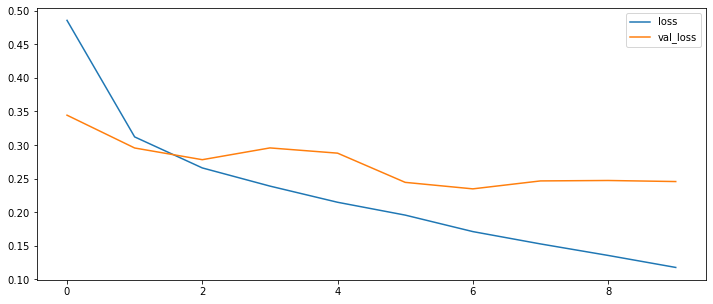

In [22]:
history = lenet.history.history

plt.figure(figsize=(12,5))
plt.plot(list(range(10)),history['loss'], label = 'loss')
plt.plot(list(range(10)),history['val_loss'], label = 'val_loss')
plt.legend();

313/313 [==============================] - 3s 10ms/step - loss: 0.2620 - acc: 0.9133


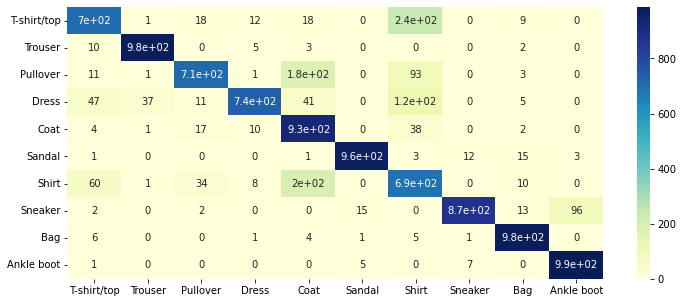

In [23]:
lenet.evaluate(X_test/255, y_test)

pred = lenet.predict(X_test)
pred = [np.argmax(arr) for arr in pred]

labels = ["T-shirt/top",
          "Trouser",
          "Pullover",
          "Dress",
          "Coat",
          "Sandal",
          "Shirt",
          "Sneaker",
          "Bag",
          "Ankle boot"]

plt.figure(figsize = (12,5))
ax = sns.heatmap(confusion_matrix(y_test, pred), 
                 annot=True, 
                 cmap="YlGnBu",
                 xticklabels=labels, 
                 yticklabels=labels)

<p style="text-align: justify"> The model we get is more accurate than the previous one as we can observe less mistakes between Coat and Pullover and a better global accuracy.</p>

<p style="text-align: justify;text-indent: 30px"> One of the biggest disavantage of this kind of model is that they require a huge amount of data and time to be trained well. A solution of this problem is to reuse pretrained model such as VGG16 or EfficientNet on large dataset.

<br>
<p style="font-size:18px;color:#004475">V. Transfer Learning </p>
</br>

<p style="text-align: justify;text-indent: 30px"> On keras you can find many pretrained models trained on huge dataset such as Imagenet, use and evaluate them on your problem. The idea is simple : imagine you are trying to classify images of trucks and you find a model trained to classify cars. The features used to identify a car are quite close of those used to identify a truck, it could work. </p>



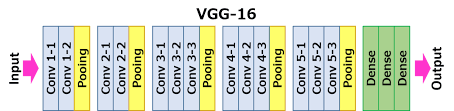

In [3]:
display.Image("src/figures/download.png",width=500)

<p style="text-align: justify;text-indent: 30px"> When we are using models such as VGG16 we usually import the feature extractor part of the model, indeed the convolutionnal part. We only trained the last layers that we add to the model and adapt to our problem. Let's see how to do that in the following code on the cifar10 dataset :

In [24]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

_, X_train, _, y_train = train_test_split(X_train_full, y_train_full, test_size=0.1, stratify=y_train_full)

base_model = VGG16(weights = 'imagenet', include_top = False, input_shape=(32,32,3))

X_train_prep = preprocess_input(X_train)
X_test_prep = preprocess_input(X_test)

for layer in base_model.layers : 
    layer.trainable = False
    
vgg = Sequential()
vgg.add(base_model)
vgg.add(GlobalAveragePooling2D())
vgg.add(Dense(1024, activation = 'relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(512, activation = 'relu'))
vgg.add(Dense(10, activation = 'softmax'))

vgg.compile(optimizer="adam", metrics = ['acc'], loss='sparse_categorical_crossentropy')

vgg.fit(X_train_prep, y_train, validation_split=0.1, batch_size=64, epochs=5)

58900480/58889256 [==============================] - 1s 0us/step
Epoch 1/5
71/71 [==============================] - 29s 404ms/step - loss: 3.8675 - acc: 0.4340 - val_loss: 1.3395 - val_acc: 0.5480
Epoch 2/5
71/71 [==============================] - 29s 414ms/step - loss: 0.9712 - acc: 0.6687 - val_loss: 1.2638 - val_acc: 0.5700
Epoch 3/5
71/71 [==============================] - 29s 414ms/step - loss: 0.6149 - acc: 0.7816 - val_loss: 1.2313 - val_acc: 0.6100
Epoch 4/5
71/71 [==============================] - 29s 403ms/step - loss: 0.4024 - acc: 0.8596 - val_loss: 1.3932 - val_acc: 0.5860
Epoch 5/5
71/71 [==============================] - 28s 393ms/step - loss: 0.2750 - acc: 0.9076 - val_loss: 1.4417 - val_acc: 0.6200


In [25]:
vgg.evaluate(X_test_prep, y_test)

313/313 [==============================] - 67s 213ms/step - loss: 1.6208 - acc: 0.5870


[1.6207669973373413, 0.5870000123977661]

<br>
<p style="font-size:18px;color:#004475">VI. YOLO - Object detection </p>
</br>
Object detection is the task of detecting multiple objects in an image which comprehenses both object localization and object classification. A first rough approach would be sliding a window with customizable dimensions and predict each time the class of the content using a network trained on cropped images. This process has a high computational cost and can luckily be automated using convolutions.
<br>YOLO stands for <b>Y</b>ou <b>O</b>nly <b>L</b>ook <b>O</b>nce and the basic idea consists in placing a grid on the image (usually $19\times 19$) where:

> Only one cell, the one containing the center/midpoint of an object is responsible for detecting this object

Each cell of the grid $(i,j)$ is labelled as follows:

<center>

> $y_{i,j}={}^T[p_c, b_x, b_y, b_w, b_h,c_1,c_2,...,c_N]$

</center>

Where:
* $p_c$: the probability of presence of an object
* $(b_x,b_y)$: the `normalized` coordinates of the object's center
* $(b_w, b_h)$: the `normalized` width and height of the object's bounding box
* $c_i$: the probability that the object belongs to the $i^{th}$ class
* $N$: the number of classes

<center><img src= "https://www.ismailmebsout.com/static/d23ad4f70ef6facd65b2660a693a7797/00d43/annot_yolo.png" width=600/></center>

Hence, for each image the target output is of size:

<center>

> $size(target\_output)=[n_x\_cell\times n_y\_cell\times (5+N), 1]$

</center>

Where $(n_x\_cell\times n_y\_cell)$ is the size of the grid.

YOLO was trained on [coco](http://cocodataset.org/#home) dataset, a large-scale object detection, segmentation and captioning database with 80 object categories. YOLOv3 has a `Darknet-53` architecture as a feature extractor also called a `backbone`.

<!-- <center><img src= "imgs/darknet_53.png" style="height:400px"/></center> -->

The training is carried out by minimizing a `loss function` using gradient methods as well. <br> It is `combined` of:

* Logistic regression loss on $p_c$ 
* Squared error loss for $b_i$ 
* Softmax loss(cross-entropy) for the probabilities $c_i$

At each epoch, in each cell, we generate the output $y_{i,j}$ and `evaluate` the loss function.<br>
When making predictions, we check that $p_c$ is high enough and for each grid-cell, we get rid of low probability prediction and use non-max suppression for each class to generate the final output.
<br>For more information, I advise you to read the official [paper](https://arxiv.org/pdf/1804.02767.pdf)

You can use [Darknet](https://pjreddie.com/darknet/yolo/) to infer with pretrained yolov3 

<span style="font-size:20px;color:#004475"><b>Go further!</b></span>
<br>
<br>
<span>

- Deep Learning avec Keras et TensorFlow: Mise en oeuvre et cas concrets, Aurélien Géron
- [Transfer Learning](https://keras.io/guides/transfer_learning/)
- Hastie T., Tibshirani R., Friedman J., [The elements of Statistical Learning](http://statweb.stanford.edu/~tibs/ElemStatLearn/)

<p style="text-align:center;color:#004475;font-size:20px"><b>*** End ***</b></p>